# Unlocking Advertising Potential: Identifying Optimal Markets for Programming Courses

In this data science project, our goal is to identify the two best markets to promote our e-learning courses on coding, namely web and mobile development. To do this, we analyzed data from freeCodeCamp's 2017 New Coder Survey, which attracted new coders with a variety of interests. Our focus was to understand the location of these new coders and their willingness to invest in learning.

During our analysis, we discovered that 86% of the respondents expressed interest in web and mobile development positions, aligning with our target audience. We narrowed down our potential markets to the United States, India, the United Kingdom, and Canada, considering their high numbers of English-speaking new coders. By calculating mean values and eliminating outliers, we determined that the USA is an ideal market due to its large population of new coders who are willing to spend a significant amount each month. For the second market, both India and Canada are viable options, as their spending distributions were statistically similar.

While the statistical analysis provides valuable insights, other factors such as market size, target audience characteristics, competition, and marketing strategies should also be taken into account when making a final decision. Therefore, we recommend sharing these findings with our marketing team, who can leverage their domain knowledge to make the best choice.

In [49]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey

/var/folders/xw/3pj1fbx137g_tcv5h8ylvr2c0000gn/T/ipykernel_45643/1526090188.py:2: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


Before we start analyzing the sample data we have, we'll make sure it's representative of the population we're interested in, and that it includes the right categories of people for our purposes.

In [50]:
survey['JobRoleInterest'].value_counts(dropna=False, normalize=True)*100

NaN                                                                                                                                                                                                                                                                                         61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                                     4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                                    2.475928
  Data Scientist                                                                                                      

The JobRoleInterest column describes for each respondent the roles they'd be interested in working in. It seems that Web Developer positions are the most sought after, which correlates with the purpose of our analysis. We will check how often Web Developer or Mobile Developer are mentioned in this survey.

In [51]:
mask1 = survey['JobRoleInterest'].str.contains('Web Developer')

mask2 = survey['JobRoleInterest'].str.contains('Mobile Developer')

mask3 = mask1 + mask2

mask3.replace({1.0:'yes', 2.0:'yes', 0.0:'no'}).value_counts(normalize=True)

yes    0.862414
no     0.137586
Name: JobRoleInterest, dtype: float64

86% of all respondents who answered this question said they would be interested in a Web Developer or Mobile Developer position, so the sample has the right categories of people for our purposes.

We will drop the rows where respondents did not answer the question about the role they are interested in in order to have the most representative sample.

In [52]:
survey2 = survey[survey['JobRoleInterest'].notna()].copy()
survey2

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18161,32.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18162,26.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18163,57.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Locations and Densities

The dataset provides information about each participant's location at the country level. The CountryCitizen variable describes the country of origin for each participant, and the CountryLive variable describes the country where each participant lives (which may be different from the country of origin).

For our analysis, we'll work with the CountryLive variable because we're interested in where people actually live at the time we run the ads.

Because the dataset provides information at the country level, we can think of each country as an individual market. This means we can formulate our goal as finding the two best countries to advertise in.

In [53]:
survey2['CountryLive'].value_counts(normalize=True, dropna=False)

United States of America    0.446939
India                       0.075515
United Kingdom              0.045051
Canada                      0.037185
NaN                         0.022025
                              ...   
Liberia                     0.000143
Papua New Guinea            0.000143
Guadeloupe                  0.000143
Gibraltar                   0.000143
Gambia                      0.000143
Name: CountryLive, Length: 138, dtype: float64

Assuming our company's courses are in English, we would choose to focus on the US, India, UK, and Canada as the English-speaking countries with the highest number of potential customers.

Next, we will filter the data for these four countries and explore how much money new programmers are willing to spend on learning. Let's say our company sells subscriptions at $59 per month, so we're interested in how much money each student spends per month.

In [54]:
# Creating a mask to sort out only respondents in the designated four countries
mask4 = (survey2['CountryLive'] == 'United States of America') | (survey2['CountryLive'] == 'India') | (survey2['CountryLive'] == 'United Kingdom') | (survey2['CountryLive'] == 'Canada')

In [55]:
# Selecting the respondents located in four countries
survey3 = survey2[mask4].copy()
survey3

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18129,55.0,0.0,NaN,NaN,NaN,NaN,4.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18130,23.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18156,29.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18163,57.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


Some students answered that they have been learning to code for 0 months (it may be that they had just started when they completed the survey). To avoid dividing by 0, we replace all values of 0 with 1 and exclude rows with NaN values.

In [56]:
survey3['MonthsProgramming'].replace({0.0:1.0}, inplace=True)
survey3 = survey3[survey3['MonthsProgramming'].notna()].copy()
survey3

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18111,30.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18113,24.0,0.0,NaN,NaN,NaN,NaN,2.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18130,23.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18156,29.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Creating a new column - how much money each student spent per month
survey3['MoneySpentMonth'] = survey3['MoneyForLearning'] / survey3['MonthsProgramming']

# Removing rows with NaN values
survey3 = survey3[survey3['MoneySpentMonth'].notna()]

survey3

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,35.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.000000
18111,30.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,200.000000
18113,24.0,0.0,NaN,NaN,NaN,NaN,2.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
18130,23.0,0.0,NaN,NaN,NaN,NaN,1.0,"between 100,000 and 1 million",NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.000000


Now we can find out how much money a student spends on average per month in our potential markets (USA, India, UK and Canada).

In [58]:
# Grouping by countries and calculating the average amount of money spent per month
survey3.groupby('CountryLive').mean()['MoneySpentMonth'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneySpentMonth, dtype: float64

The results for the United Kingdom and Canada are surprisingly low compared to what we see for India. If we were to look at some socioeconomic measures (such as GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It could be that we don't have enough representative data for the UK, Canada, and India, or we have some outliers (perhaps from false survey responses) that make the mean too high for India, or too low for the UK and Canada. Or the results may be correct.

We will visualize the distribution of MoneySpentMonth for each country.

## Eliminating Extreme Outliers

In [59]:
usa_money = survey3[survey3['CountryLive'] == 'United States of America']['MoneySpentMonth']
uk_money = survey3[survey3['CountryLive'] == 'United Kingdom']['MoneySpentMonth']
india_money = survey3[survey3['CountryLive'] == 'India']['MoneySpentMonth']
canada_money = survey3[survey3['CountryLive'] == 'Canada']['MoneySpentMonth']

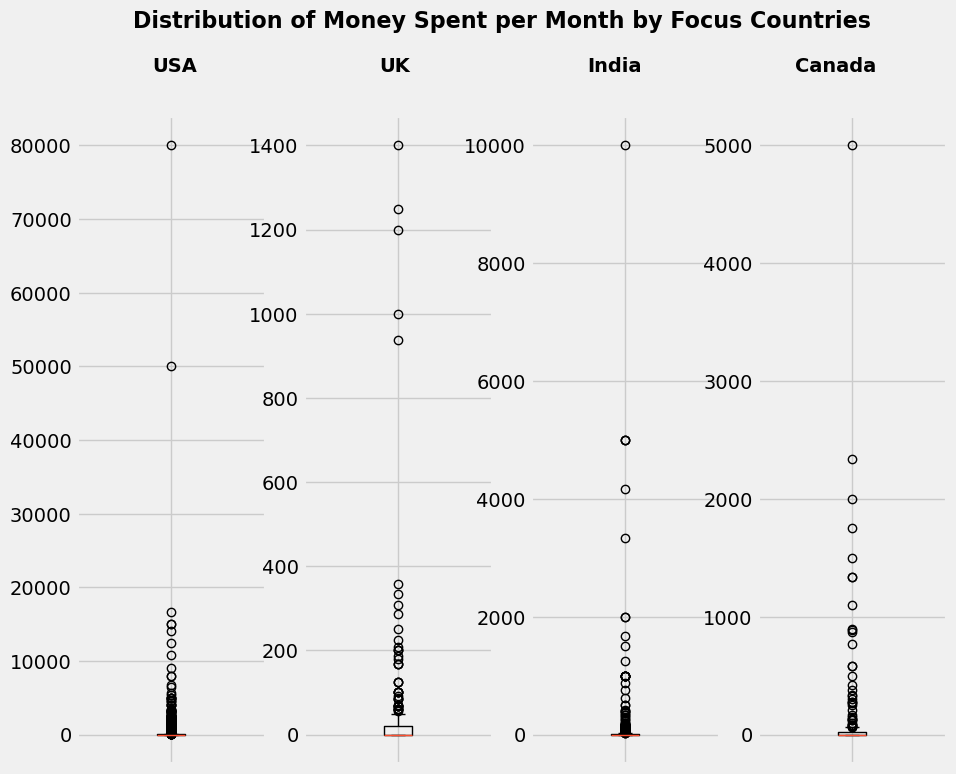

In [60]:
import matplotlib.pyplot as plt

import matplotlib.style as style

%matplotlib inline

style.use("fivethirtyeight")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(10, 8))

ax1.boxplot(usa_money)
ax2.boxplot(uk_money)
ax3.boxplot(india_money)
ax4.boxplot(canada_money)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])

ax1.text(0.8, 96000, 'Distribution of Money Spent per Month by Focus Countries', size=16, weight='bold')
ax1.text(0.9, 90000, s='USA', size=14, weight='bold')
ax1.text(2.1, 90000, s='UK', size=14, weight='bold')
ax1.text(3.2, 90000, s='India', size=14, weight='bold')
ax1.text(4.3, 90000, s='Canada', size=14, weight='bold')

plt.show()

We eliminate extreme outliers that are more than 3 standard deviations from the mean.

In [61]:
usa_money.describe()

count     2933.000000
mean       227.997996
std       1940.245614
min          0.000000
25%          0.000000
50%          3.333333
75%         50.000000
max      80000.000000
Name: MoneySpentMonth, dtype: float64

In [62]:
# Selecting rows for USA with values less than 3 standard deviations over the mean
usa = survey3[survey3['CountryLive'] == 'United States of America'].copy()
usa = usa.loc[usa['MoneySpentMonth'] < (usa_money.describe()[1] + usa_money.describe()[2] * 3)]

usa['MoneySpentMonth'].describe()

count    2920.000000
mean      142.654608
std       502.692169
min         0.000000
25%         0.000000
50%         3.333333
75%        50.000000
max      5666.666667
Name: MoneySpentMonth, dtype: float64

In [63]:
uk_money.describe()

count     279.000000
mean       45.534443
std       162.311836
min         0.000000
25%         0.000000
50%         0.000000
75%        20.416667
max      1400.000000
Name: MoneySpentMonth, dtype: float64

In [64]:
# Selecting rows for UK
uk = survey3[survey3['CountryLive'] == 'United Kingdom'].copy()
uk = uk.loc[uk['MoneySpentMonth'] < (uk_money.describe()[1] + uk_money.describe()[2] * 3)]

uk['MoneySpentMonth'].describe()

count    274.000000
mean      25.245838
std       57.025994
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      357.142857
Name: MoneySpentMonth, dtype: float64

In [65]:
india_money.describe()

count      463.000000
mean       135.100982
std        692.960378
min          0.000000
25%          0.000000
50%          0.000000
75%         13.250000
max      10000.000000
Name: MoneySpentMonth, dtype: float64

In [66]:
# Selecting rows for India
india = survey3[survey3['CountryLive'] == 'India'].copy()
india = india.loc[india['MoneySpentMonth'] < (india_money.describe()[1] + india_money.describe()[2] * 3)]

india['MoneySpentMonth'].describe()

count     457.000000
mean       65.758763
std       233.452738
min         0.000000
25%         0.000000
50%         0.000000
75%        12.500000
max      2000.000000
Name: MoneySpentMonth, dtype: float64

In [67]:
canada_money.describe()

count     240.000000
mean      113.510961
std       441.014158
min         0.000000
25%         0.000000
50%         0.000000
75%        25.000000
max      5000.000000
Name: MoneySpentMonth, dtype: float64

In [68]:
# Selecting rows for Canada
canada = survey3[survey3['CountryLive'] == 'Canada'].copy()
canada = canada.loc[canada['MoneySpentMonth'] < (canada_money.describe()[1] + canada_money.describe()[2] * 3)]

canada['MoneySpentMonth'].describe()

count     235.000000
mean       62.363676
std       194.886160
min         0.000000
25%         0.000000
50%         0.000000
75%        21.130952
max      1333.333333
Name: MoneySpentMonth, dtype: float64

In [69]:
# Concatenating the new dataframes for four countries
survey_new = pd.concat([usa, uk, india, canada], axis=0, ignore_index=True)
survey_new

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentMonth
0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
1,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
2,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
4,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,50.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,4.166667
3882,35.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.000000
3883,36.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,25.000000
3884,34.0,0.0,NaN,NaN,NaN,NaN,1.0,"less than 100,000",NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.285714


In [70]:
# Grouping by countries and calculating the average amount of money spent per month
survey_new.groupby('CountryLive').mean()['MoneySpentMonth'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
India                        65.758763
Canada                       62.363676
United Kingdom               25.245838
Name: MoneySpentMonth, dtype: float64

One country we should definitely target is the USA, since there are clearly a lot of new coders living there and they are willing to pay a good amount of money each month. The second market to choose should be either India or Canada, and since they show almost the same average amount spent per month, we will investigate these two countries further.

## Comparing Canada and India

First, we will compare two distributions using kernel density estimation.

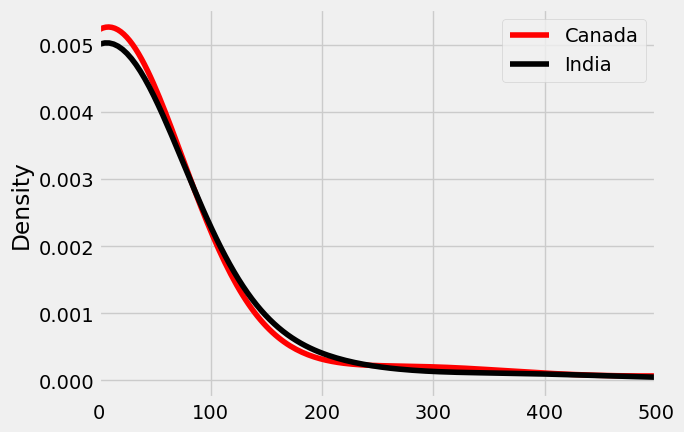

In [71]:
# Plotting kde for two countries
canada['MoneySpentMonth'].plot.kde(label='Canada', color='Red')
india['MoneySpentMonth'].plot.kde(label='India', color='Black')
plt.xlim([0, 500])
plt.legend()
plt.show()

Two distributions look nearly identical. We could perform a hypothesis test to determine if there is a significant difference in the distribution of expenditures between Canada and India.

Since the data is continuous and we are comparing two independent groups, we will use a two-sample t-test. The null hypothesis (H0) would be that there is no significant difference in spending between the two countries, while the alternative hypothesis (H1) would be that there is a significant difference.

In [72]:
from scipy.stats import ttest_ind

# Performing two-sample t-test
t_statistic, p_value = ttest_ind(canada['MoneySpentMonth'], india['MoneySpentMonth'])

# Defining significance level (alpha)
alpha = 0.05

# Checking if the p-value is less than the significance level
if p_value < alpha:
    print('Reject null hypothesis. There is a significant difference in spending distributions between Canada and India.')
else:
    print('Fail to reject null hypothesis. There is no significant difference in spending distributions between Canada and India.')


Fail to reject null hypothesis. There is no significant difference in spending distributions between Canada and India.


The statistical analysis shows that there is no significant difference in spending distribution between Canada and India, so we should consider additional factors to determine which market is better to advertise in.

We can also compare the percentile ranks of our assumed subscription price ($59) for each country.

In [73]:
from scipy.stats import percentileofscore

print('India: ', percentileofscore(a = india['MoneySpentMonth'], score = 59, kind = 'weak'),
     '\n',
     'Canada: ', percentileofscore(a = canada['MoneySpentMonth'], score = 59, kind = 'weak'))

India:  84.9015317286652 
 Canada:  85.1063829787234


The percentile rank of our price in the distribution of both markets is also almost the same (85%), only 15% of new coders spend more than $59 per month on learning.

Considering that statistical analysis is only one aspect of decision making, and other factors such as market size, audience characteristics, competition, and marketing strategies should also be considered when selecting a market to promote our courses, it might be better to send our results to our marketing team and let them use their domain knowledge to make the best decision.

# Conclusion

In conclusion, our goal in this project was to identify the two best markets to advertise our programming courses for an e-learning company. We achieved this by analyzing the data from freeCodeCamp's 2017 New Coder Survey, focusing on the locations and spending habits of new coders.

Our findings indicate that the United States (USA) is a clear choice for advertising, as it has a significant number of new coders who are willing to invest a substantial amount of money in learning. For the second market, both India and Canada emerged as potential options, with statistically similar spending distributions and a high concentration of English-speaking new coders.

However, it is important to note that the selection of the second market should consider additional factors beyond statistical analysis, such as market size, target audience characteristics, competition, and marketing strategies. Therefore, we recommend sharing these results with the marketing team, who can leverage their expertise to make an informed decision.

By understanding the preferences and behaviors of new coders, we have laid a solid foundation for effective advertisement campaigns, enabling our e-learning company to reach the most promising markets and maximize returns on our programming courses.